In [14]:
from datetime import datetime
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Successfully read the file with encoding: utf-8


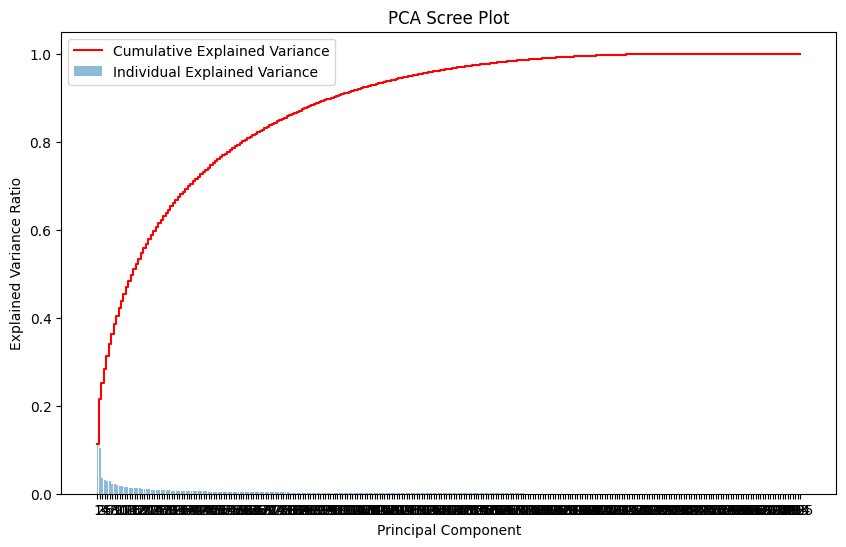

Optimal number of components to explain 95% variance: 128


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# -----------------------------
# 1. Data Preparation
# -----------------------------
data = None
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
file_path = r"C:\Users\leere\PycharmProjects\Football_ML3\engineered_master_data.csv"

for encoding in encodings:
    try:
        data = pd.read_csv(file_path, encoding=encoding, low_memory=False)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with encoding: {encoding}")

if data is None:
    raise ValueError("Could not read the file with any of the provided encodings.")

# Convert 'date' column to datetime object
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d", errors='coerce')
data = data.sort_values(by='date')

# Filter out any future matches.
today = pd.Timestamp(datetime.today().date())
data = data[data['date'] <= today]

# Compute total corners and a binary target (1 if total corners > 10.5, else 0)
data['total_corners'] = data['corners_home'] + data['corners_away']
data['target'] = data['total_corners'].apply(lambda x: 1 if x > 10.5 else 0)

# -----------------------------
# 2. PCA on Engineered Numeric Features
# -----------------------------
# Select only numerical columns for PCA.
# (You might want to drop columns that are not engineered or are identifiers.)
numeric_df = data.select_dtypes(include=[np.number]).dropna()

# For example, you might want to exclude target if you wish to see variance only in features:
features_for_pca = numeric_df.drop(columns=['target'])  # adjust list if needed

# Standardize the features.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_pca)

# Perform PCA with all components.
pca = PCA()
pca.fit(scaled_features)

# Calculate explained variance.
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the scree plot (individual and cumulative explained variance).
plt.figure(figsize=(10, 6))
components = np.arange(1, len(explained_variance) + 1)
plt.bar(components, explained_variance, alpha=0.5, label='Individual Explained Variance')
plt.step(components, cumulative_variance, where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.xticks(components)
plt.legend(loc='best')
plt.show()

# Determine optimal number of components (e.g., components to explain 95% of variance).
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to explain 95% variance: {optimal_components}")
